In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv("data/crime.csv", sep=',')

In [4]:
data.describe()


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC
count,4.633540e+05,4.633540e+05,463354.000000,463354.000000,4.595850e+05,4.595850e+05,459585.000000,459585.000000,463354.000000,463354.000000,463354.000000,463354.000000
mean,3.768453e+09,3.768453e+15,3841.490375,0.204442,3.162996e+06,1.695049e+06,-104.929601,39.719546,3.484260,365.906983,0.739745,0.260773
std,9.463126e+09,9.463126e+15,1656.029126,0.577973,6.734038e+05,1.657405e+05,1.884575,0.713643,1.770915,177.807483,0.438774,0.439057
min,2.015800e+04,2.015854e+10,902.000000,0.000000,3.050128e+06,1.648935e+06,-105.321797,0.000001,1.000000,111.000000,0.000000,0.000000
25%,2.014626e+09,2.014626e+15,2305.000000,0.000000,3.138096e+06,1.683027e+06,-105.009023,39.707508,2.000000,213.000000,0.000000,0.000000
50%,2.016508e+09,2.016508e+15,3572.000000,0.000000,3.145541e+06,1.694757e+06,-104.982602,39.739773,3.000000,323.000000,1.000000,0.000000
75%,2.018210e+09,2.018210e+15,5441.000000,0.000000,3.161705e+06,1.701577e+06,-104.925451,39.758440,5.000000,521.000000,1.000000,1.000000
max,2.018792e+12,2.018792e+18,7399.000000,5.000000,4.067476e+07,1.141836e+07,-0.000001,39.904311,7.000000,759.000000,1.000000,1.000000


In [21]:
data.head(3)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0


In [5]:
data.isnull().any()

INCIDENT_ID               False
OFFENSE_ID                False
OFFENSE_CODE              False
OFFENSE_CODE_EXTENSION    False
OFFENSE_TYPE_ID           False
OFFENSE_CATEGORY_ID       False
FIRST_OCCURRENCE_DATE     False
LAST_OCCURRENCE_DATE       True
REPORTED_DATE             False
INCIDENT_ADDRESS           True
GEO_X                      True
GEO_Y                      True
GEO_LON                    True
GEO_LAT                    True
DISTRICT_ID               False
PRECINCT_ID               False
NEIGHBORHOOD_ID           False
IS_CRIME                  False
IS_TRAFFIC                False
dtype: bool

In [6]:
val = data['FIRST_OCCURRENCE_DATE'].iloc[0]

In [7]:
print(val)

6/15/2016 11:31:00 PM


In [8]:
def extractDay(dateString):
    try:
        return int(dateString.split('/')[1])
    except Exception as e:
        #print(dateString)
        print('Error')

def extractMonth(dateString):
    return int(dateString.split('/')[0])

def extractYear(dateString):
    return int(dateString.split('/')[2].split(' ')[0])

def generateDayMonthYearDf(seriesDates):
    arrayDates = seriesDates.values
    days = [extractDay(s) for s in arrayDates]
    months = [extractMonth(s) for s in arrayDates]
    years = [extractYear(s) for s in arrayDates]
    dmyDf = pd.DataFrame({
        'day': days,
        'month': months,
        'year': years
    })
    return dmyDf

## Analyze the day, month, and year of first occurrence date

In [9]:
# some date strings are just numbers
dmyDf = generateDayMonthYearDf(data['FIRST_OCCURRENCE_DATE'])

In [10]:
dmyDf.describe()

,day,month,year
count,463354.000000,463354.000000,463354.000000
mean,15.640597,6.418332,2016.133777
std,8.797702,3.431665,1.466550
min,1.000000,1.000000,2014.000000
25%,8.000000,3.000000,2015.000000
50%,16.000000,6.000000,2016.000000
75%,23.000000,9.000000,2017.000000
max,31.000000,12.000000,2019.000000


(array([0.03398338, 0.03247265, 0.03277696, 0.03289422, 0.03328485,
        0.03319492, 0.03340498, 0.03238489, 0.03170146, 0.03723503]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

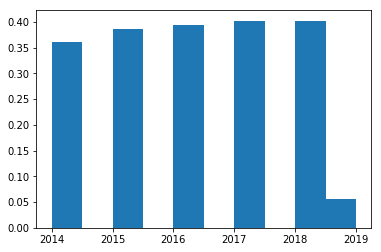

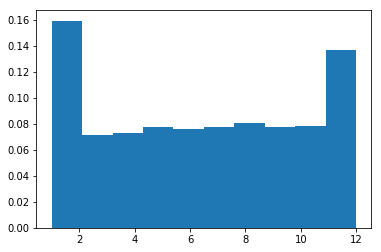

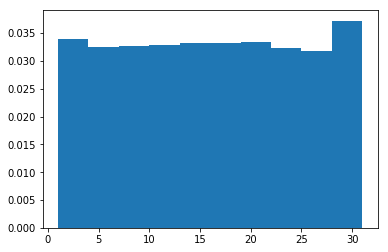

In [13]:
plt.figure(0)
plt.hist(dmyDf['year'], normed=True)

plt.figure(1)
plt.hist(dmyDf['month'], normed=True)

plt.figure(2)
plt.hist(dmyDf['day'], normed=True)

In [14]:
dataClean = data.dropna(0)

In [18]:
dataClean.isnull().any()
print(dataClean.shape)
print(data.shape)

(137843, 19)
(463354, 19)


In [20]:
print(dataClean['IS_CRIME'].sum())
print(dataClean['IS_TRAFFIC'].sum())

137486
369


In [24]:
# 123 different offense codes so probably don't try to predict offense code
dataClean.groupby('OFFENSE_CODE').count()



,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
OFFENSE_CODE,,,,,,,,,,,,,,,,,,
902,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
912,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
1006,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
1099,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
1202,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397,397
1205,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974,974
1208,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
1210,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
1211,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58


In [33]:
# Data for kmeans clustering

dataClean.dtypes

# start with clustering on numerical features, forget about the ones needing one hot encoding
# use: geo_x, geo_y, geo_lon, geo_lat, is_crime

# try clustering on geo location only and see if the labels correspond with what they actually are
# aggregate based on location to compare points

geoData = dataClean[['GEO_X', 'GEO_Y', 'GEO_LON', 'GEO_LAT']]

# check for inifinity values





In [50]:
%%latex

$\frac{2}{3}$

<IPython.core.display.Latex object>

In [46]:
# k-means clustering
from sklearn.cluster import KMeans

costs = []

for i in range(2,40,4):
    kmeansOut = KMeans(n_clusters=i, random_state=23).fit(geoData)
    costs.append(kmeansOut.inertia_)


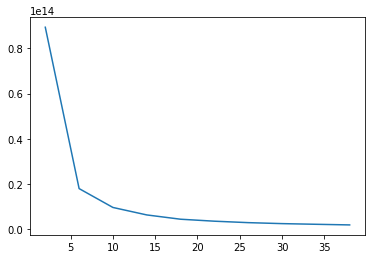

In [47]:
plt.plot(range(2,40,4) ,costs)

From the above, we can see that 10 clusters is a good point to start at for locations where crimes occur.